In [16]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [17]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from tensorflow.keras.callbacks import *

In [18]:
CLASS_NAMES= ['healthy', 'mild', 'moderate', 'severe']
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3
NUM_CLASSES = len(CLASS_NAMES)

# **ResNET**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#load data
data_x = np.load('data_x_aumentated_normalized.npy') #images
data_y = np.load('data_y_aumentated_normalized.npy') #labels
TOTAL_IMAGES = len(data_y)
print("TOTAL_IMAGES = ", TOTAL_IMAGES)

TOTAL_IMAGES =  2368


# **Splitting data in train - validation - test**

In [21]:
#percentage of the dataset which will be on TRAIN - TEST - VALIDATION
TRAIN_PERCENTAGE = 0.8
TEST_PERCENTAGE = 0.1
VALIDATION_PERCENTAGE = 0.1

In [22]:
train_size = int(TRAIN_PERCENTAGE * TOTAL_IMAGES)
test_size = int(TEST_PERCENTAGE * TOTAL_IMAGES)
validation_size = int(VALIDATION_PERCENTAGE * TOTAL_IMAGES)

In [23]:
train_x = data_x[:train_size]
train_y = data_y[:train_size]
data_x = data_x[train_size:]
data_y = data_y[train_size:]

test_x = data_x[:test_size]
test_y = data_y[:test_size]
data_x = data_x[test_size:]
data_y = data_y[test_size:]

validation_x = data_x #all the remainder we can let on validation
validation_y = data_y
del data_x
del data_y

In [24]:
print("train_size = ", len(train_y))
print("test_size = ", len(test_y))
print("validation_size = ", len(validation_y))

train_size =  1894
test_size =  236
validation_size =  238


In [25]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [27]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB1
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.applications import EfficientNetB4
# from tensorflow.keras.applications import EfficientNetB5
# from tensorflow.keras.applications import EfficientNetB6
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import *

In [28]:
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [29]:
model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT,IMG_WIDTH, CHANNELS),
    pooling=None,
    classes=NUM_CLASSES,
   # classifier_activation="softmax",
#    **kwargs
)

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers

new_model = models.Sequential()
new_model.add(model)
#3rd conv layer
new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#4th conv layer
new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#Flatten Layer
new_model.add(tf.keras.layers.Flatten())

new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.Dropout(0.2))
#new_model.add(tf.keras.layers.l2( l=0.01))
#new_model.add(layers.GlobalAveragePooling2D())
#output Dense Layer
new_model.add(tf.keras.layers.Dense(NUM_CLASSES))
new_model.add(tf.keras.layers.Activation('softmax'))
adam = tf.keras.optimizers.Adam(lr=0.001)


C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [31]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 32)          589856    
                                                                 
 batch_normalization_10 (Bat  (None, 4, 4, 32)         128       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 4, 4, 32)          0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 64)         

In [32]:
epochs = 100

#compila e treina o modelo com os dados carregados
new_model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer=adam)
model_trained = new_model.fit(train_x, train_y,epochs=epochs,verbose=2,validation_data=(validation_x, validation_y),shuffle=False)

Epoch 1/100
60/60 - 36s - loss: 1.6857 - acc: 0.6267 - val_loss: 2.7768 - val_acc: 0.2689 - 36s/epoch - 605ms/step
Epoch 2/100
60/60 - 26s - loss: 0.9577 - acc: 0.8754 - val_loss: 2.4267 - val_acc: 0.3487 - 26s/epoch - 431ms/step
Epoch 3/100
60/60 - 26s - loss: 0.6440 - acc: 0.9398 - val_loss: 4.8140 - val_acc: 0.3824 - 26s/epoch - 431ms/step
Epoch 4/100
60/60 - 26s - loss: 0.5170 - acc: 0.9498 - val_loss: 4.0527 - val_acc: 0.4412 - 26s/epoch - 429ms/step
Epoch 5/100
60/60 - 26s - loss: 0.4128 - acc: 0.9520 - val_loss: 2.4751 - val_acc: 0.5588 - 26s/epoch - 429ms/step
Epoch 6/100
60/60 - 26s - loss: 0.3009 - acc: 0.9747 - val_loss: 0.6082 - val_acc: 0.8866 - 26s/epoch - 428ms/step
Epoch 7/100
60/60 - 26s - loss: 0.2866 - acc: 0.9604 - val_loss: 0.9843 - val_acc: 0.7941 - 26s/epoch - 428ms/step
Epoch 8/100
60/60 - 26s - loss: 0.2062 - acc: 0.9805 - val_loss: 0.8036 - val_acc: 0.7731 - 26s/epoch - 428ms/step
Epoch 9/100
60/60 - 26s - loss: 0.1761 - acc: 0.9810 - val_loss: 0.7123 - val_ac

Epoch 71/100
60/60 - 26s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.1988 - val_acc: 0.9706 - 26s/epoch - 427ms/step
Epoch 72/100
60/60 - 26s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1847 - val_acc: 0.9706 - 26s/epoch - 427ms/step
Epoch 73/100
60/60 - 26s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.1956 - val_acc: 0.9706 - 26s/epoch - 427ms/step
Epoch 74/100
60/60 - 26s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1417 - val_acc: 0.9664 - 26s/epoch - 427ms/step
Epoch 75/100
60/60 - 26s - loss: 5.6498e-04 - acc: 1.0000 - val_loss: 0.1266 - val_acc: 0.9664 - 26s/epoch - 427ms/step
Epoch 76/100
60/60 - 26s - loss: 3.9594e-04 - acc: 1.0000 - val_loss: 0.1260 - val_acc: 0.9664 - 26s/epoch - 427ms/step
Epoch 77/100
60/60 - 26s - loss: 2.8826e-04 - acc: 1.0000 - val_loss: 0.1302 - val_acc: 0.9664 - 26s/epoch - 427ms/step
Epoch 78/100
60/60 - 26s - loss: 4.3892e-04 - acc: 1.0000 - val_loss: 0.1837 - val_acc: 0.9664 - 26s/epoch - 427ms/step
Epoch 79/100
60/60 - 26s - loss: 0.0030 - acc: 1.0000 - 

In [33]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 16, 16, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_8 (Conv2D)              (None, 8, 8, 728)    186368      ['add_13[0][0]']                 
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 8, 8, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 8, 8, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 8, 8, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_18[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 8, 8, 728)   0           ['add_19[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 8, 8, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 8, 8, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 8, 8, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 8, 8, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_22 (Add)                   (None, 8, 8, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_21[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, 8, 8, 728)   0           ['add_22[0][0]']                 
 on)      

In [34]:
def getLayerIndexByName(model, layername):
    for idx, layer in enumerate(model.layers):
        if layer.name == layername:
            return idx

In [35]:
#print(getLayerIndexByName(new_model, 'flatten_1')) #just used to get the index of flatten layer

In [36]:
model_name = f'xception-baseline-holdout-{epochs}epochs_normalized.npy'
new_model.save(model_name)

INFO:tensorflow:Assets written to: xception-baseline-holdout-100epochs_normalized.npy\assets


INFO:tensorflow:Assets written to: xception-baseline-holdout-100epochs_normalized.npy\assets


# **Random Forest - flatting**

In [37]:
new_model_rf = keras.Model(inputs=new_model.input, outputs=new_model.get_layer(index=9).output)
featureVector = new_model_rf.predict(train_x)

60/60 [==============================] - 7s 107ms/step


In [38]:
featureVector2 = new_model_rf.predict(test_x)

8/8 [==============================] - 1s 174ms/step


In [39]:
print(featureVector.shape)

(1894, 64)


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(featureVector,train_y)



RandomForestClassifier()

In [42]:
test_x.shape

(236, 128, 128, 3)

In [43]:
y_pred=clf.predict(featureVector2)

In [44]:
featureVector.shape

(1894, 64)

In [45]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.9322033898305084


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf = DecisionTreeClassifier(random_state=0)

# **Testes**

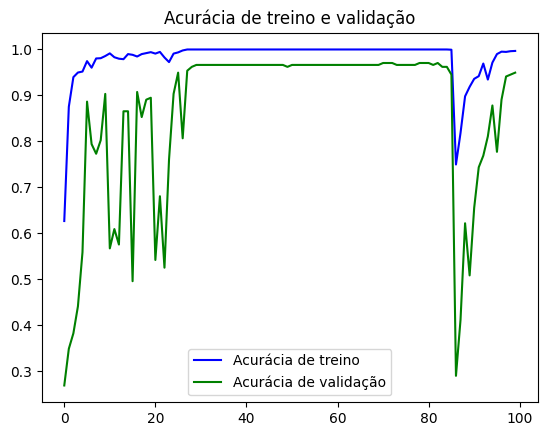

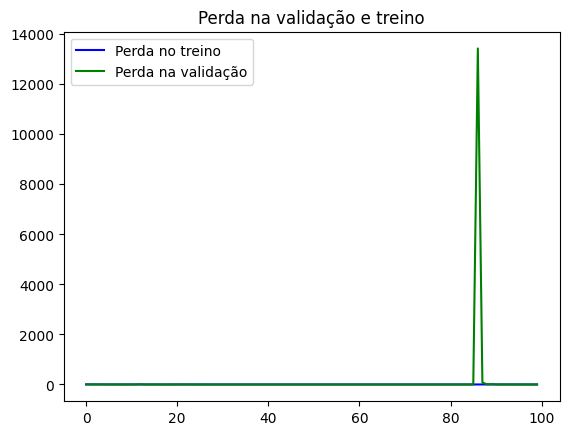

In [48]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda no treino')
plt.plot(epochs, val_loss, 'g', label='Perda na validação')
plt.title('Perda na validação e treino')
plt.legend()
plt.show()

In [49]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_y, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

8/8 [==============================] - 1s 109ms/step - loss: 0.2888 - acc: 0.9322
Test loss: 0.28883105516433716
Test accuracy: 0.9322034120559692


In [50]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [52]:
cm = confusion_matrix(test_y, pred_probs)

In [53]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_y, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)

F1 Score: 0.9330628968467919
Sensitivity: [0.90540541 0.98039216 0.96226415 0.89655172]
Specificity: [1.         0.97297297 0.94535519 0.99438202]
Precision:   [1.         0.90909091 0.83606557 0.98113208]
Accuracy:    [0.97033898 0.97457627 0.94915254 0.97033898]
